In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
from utils import citibike_helpers,nyctaxi_helpers
import numpy as np
import pandas as pd  #requirement comes with anaconda
import datetime 
from datetime import datetime as dt
from geopy.distance import vincenty # requires separate install - pip install geopy
import warnings
warnings.filterwarnings('ignore')

#Imports for Classification
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Split Training and Testing Set.
from sklearn.model_selection import train_test_split

#Generate Classification Performance Results
from sklearn.metrics import classification_report


#Imports for Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Helpers to Read In Dataset

In [3]:
inputfile="../datasets/citibike/201701-citibike-tripdata.csv.gz"
df = citibike_helpers.load_citibike_data(inputfile)
df = citibike_helpers.calculate_trip_durations_citibike(df)

# Helpers to Preprocess Dataset

In [5]:
df['Start Time'] =  pd.to_datetime(df['Start Time'], format='%Y-%m-%d %H:%M:%S')
df['Start Time Hour'] = pd.DatetimeIndex(df['Start Time']).hour
df['Start Time Minute'] = pd.DatetimeIndex(df['Start Time']).minute
df['Start Time Day of Week'] = pd.DatetimeIndex(df['Start Time']).dayofweek
f = lambda x: vincenty((x['Start Station Latitude'],x['Start Station Longitude']),(x['End Station Latitude'],x['End Station Longitude'])).miles
df['distance'] = df.apply(f,axis=1)

#Isolate Trips between 5 and 120 minutes.
subset_trips=df[(df['Trip Duration Minutes']>5) & (df['Trip Duration Minutes']<120)]
subset_trips.drop(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID','Start Station Name','End Station Name','End Station ID', 'Bike ID'],axis=1,inplace=True)
subset_trips.head()

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,User Type,Birth Year,Gender,Trip Duration Minutes,Start Time Hour,Start Time Minute,Start Time Day of Week,distance
0,40.782750,-73.971370,40.775794,-73.976206,Subscriber,1965.0,2,11.333333,0,0,6,0.542899
1,40.729236,-73.990868,40.748549,-73.988084,Subscriber,1987.0,2,21.383333,0,0,6,1.340572
2,40.776829,-73.963888,40.768737,-73.961199,Customer,NaN,0,10.816667,0,0,6,0.575889
3,40.776829,-73.963888,40.768737,-73.961199,Customer,NaN,0,10.533333,0,1,6,0.575889
4,40.776829,-73.963888,40.768737,-73.961199,Customer,NaN,0,10.366667,0,1,6,0.575889


In [6]:
subset_trips = pd.get_dummies(subset_trips)
subset_trips.dropna(inplace=True)
subset_trips.head(2)

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,Birth Year,Gender,Trip Duration Minutes,Start Time Hour,Start Time Minute,Start Time Day of Week,distance,User Type_Customer,User Type_Subscriber
0,40.782750,-73.971370,40.775794,-73.976206,1965.0,2,11.333333,0,0,6,0.542899,0,1
1,40.729236,-73.990868,40.748549,-73.988084,1987.0,2,21.383333,0,0,6,1.340572,0,1


# Helper to Create Two Separate Dataframes for Classification and Regression

In [7]:
subset_trips_classification=subset_trips.copy(deep=True)
subset_trips_regression=subset_trips.copy(deep=True)

In [8]:
#Helper to categorize triptime into discrete classes
def categorize_pickup_times(time_min):
    if time_min<20: # Very Short Trips
        return 1
    elif time_min>=20 and time_min<45: #Medium Length Trips
        return 2
    elif time_min>=45: #Long Trips
        return 3

In [9]:
subset_trips_classification['Trip Duration Class']=subset_trips_classification['Trip Duration Minutes'].apply(lambda x: categorize_pickup_times(x))

In [10]:
# Class Distribution
# Class 1 466540
# Class 2 79467
# Class 3 2937

# Classification

> Use the `subset_trips_classification` dataframe for this part.

> Classification Task: Classify  `Trip Duration Class` using all features in the `subset_trips_classification` dataframe except:  

> `Trip Duration Minutes` and  `Trip Duration Class`.

Run Naive Bayes (Gaussian Naive Bayes), Multi Layer Perceptron, Decision Tree Classifier and K Neighbors Classifier using the scikit-learn package.

Note: For each model you will have to split the data into training and testing sets using the train_test_split function in scikit-learn and use a test_size of 0.33 (33%).

Report Classification Results (precision, recall and f1-score) using the classification_report function from scikit-learn.metrics

In [11]:
subset_trips_classification.head()

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,Birth Year,Gender,Trip Duration Minutes,Start Time Hour,Start Time Minute,Start Time Day of Week,distance,User Type_Customer,User Type_Subscriber,Trip Duration Class
0,40.782750,-73.971370,40.775794,-73.976206,1965.0,2,11.333333,0,0,6,0.542899,0,1,1
1,40.729236,-73.990868,40.748549,-73.988084,1987.0,2,21.383333,0,0,6,1.340572,0,1,2
5,40.773407,-73.977825,40.773407,-73.977825,2000.0,1,11.100000,0,1,6,0.000000,0,1,1
6,40.769155,-73.981918,40.760193,-73.991255,1973.0,1,9.333333,0,5,6,0.788935,0,1,1
7,40.751726,-73.987535,40.727408,-73.981420,1977.0,2,13.783333,0,5,6,1.708449,0,1,1


In [27]:
# Type your Classification Code Here
import math
models = {}
dtmodel = DecisionTreeClassifier(random_state = 100, class_weight="balanced")
gnbmodel = GaussianNB()
mlpc = MLPClassifier()
knn = KNeighborsClassifier(n_neighbors=9)
models.update({'DecisionTree':dtmodel})
models.update({'NaiveBayes':gnbmodel})
models.update({'MLP':mlpc})
models.update({'KNeighbors':knn})

In [44]:
y_cls=subset_trips_classification['Trip Duration Class']
XX_cls=subset_trips_classification.drop(['Trip Duration Class', 'Trip Duration Minutes'],axis=1)
for model_name, model in models.items():
    print("Running the {} Classifier...".format(model_name))
    scores = []
    X_train, X_test, y_train, y_test = train_test_split(XX_cls, y_cls, test_size=0.90, random_state=42)
    clf=model.fit(X_train, y_train)
    preds=clf.predict(X_test)
    print(classification_report(preds, y_test))

Running the DecisionTree Classifier...
             precision    recall  f1-score   support

          1       0.93      0.93      0.93    421174
          2       0.59      0.60      0.60     70136
          3       0.10      0.09      0.09      2740

avg / total       0.88      0.88      0.88    494050

Running the MLP Classifier...
             precision    recall  f1-score   support

          1       0.98      0.92      0.95    445582
          2       0.55      0.81      0.65     48468
          3       0.00      0.00      0.00         0

avg / total       0.94      0.91      0.92    494050

Running the KNeighbors Classifier...
             precision    recall  f1-score   support

          1       1.00      0.87      0.93    478760
          2       0.19      0.87      0.31     15290
          3       0.00      0.00      0.00         0

avg / total       0.97      0.87      0.91    494050

Running the NaiveBayes Classifier...
             precision    recall  f1-score   support


According to the classification reports provided by sklearn, the MLP and Naive Bayes classifiers seem to be the best due to their high weighted average for f1-score. 

In order to establish which one is the best, however, we recall the actual distribution of the classes across the data-set:
**Class Distribution**

Class 1 466540

Class 2 79467

Class 3 2937

It is now fairly notice-able that there are short-comings with both the MLP Classifier as well as the Naive Bayes. MLP seems to be very far off by noting 0 instances of the Class 3 and much fewer of the Class 2 than there actually are. Naive Bayes got very close to the correct values for Class 1 and 3, but equally far off from the Class 2 as MLP.

It can be argued that in the context that is provided here, aka the classes represent distinct quantizations of ride-distances, it would be valuable to be able to predict long rides and medium rides fairly accurately. Therefore, the best classification method is the Decision Tree, which had the worst avg/total f1 score but was more valuable for classification of classes with smaller instance numbers.

# Regression

Use the `subset_trips_regression` dataframe for this part.

> Run Linear Regression, K-Neighbors Regressor using the scikit-learn package.

> Regression Task: Predict `Trip Duration Minutes` using all features in the `subset_trips_regression` dataframe except:  

> `Trip Duration Minutes`.

Note: For each model you will have to split the data into training and testing sets using the train_test_split function in scikit-learn and use a test_size of 0.33 (33%).
 
Report regression performance using the  r2_score function in the scikit-learn.metrics module

In [59]:
subset_trips_regression.head(3)

,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,Birth Year,Gender,Trip Duration Minutes,Start Time Hour,Start Time Minute,Start Time Day of Week,distance,User Type_Customer,User Type_Subscriber
0,40.782750,-73.971370,40.775794,-73.976206,1965.0,2,11.333333,0,0,6,0.542899,0,1
1,40.729236,-73.990868,40.748549,-73.988084,1987.0,2,21.383333,0,0,6,1.340572,0,1
5,40.773407,-73.977825,40.773407,-73.977825,2000.0,1,11.100000,0,1,6,0.000000,0,1


In [62]:
def training():
    y_cls =  subset_trips_regression['Trip Duration Minutes']
    XX_cls = subset_trips_regression.drop('Trip Duration Minutes',axis=1)
    return X_train, X_test, y_train, y_test = train_test_split(XX_cls, y_cls, test_size=0.33, random_state=42)

Attempt using personally written data processing.

In [63]:
# Type Your Regression Code Here
# Linear Regression Attempt
y_cls =  subset_trips_regression['Trip Duration Minutes']
XX_cls = subset_trips_regression.drop('Trip Duration Minutes',axis=1)
X_train, X_test, y_train, y_test = train_test_split(XX_cls, y_cls, test_size=0.33, random_state=42)

lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean Squared Error 31.6349344479
R2 0.519254921016


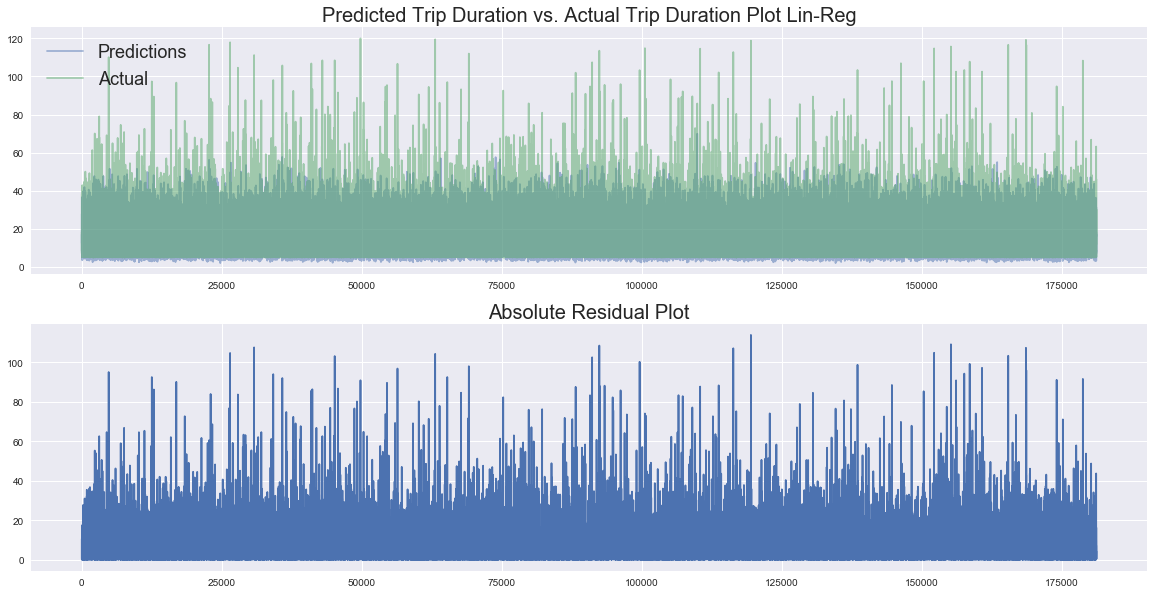

In [68]:
fig,ax=plt.subplots(2,1,figsize=(20,10))
preds=lin_reg.predict(X_test)
ax[0].plot(preds,alpha=0.5)
ax[0].plot(y_test.values,alpha=0.5)
ax[0].legend(['Predictions','Actual'],fontsize=18)
ax[0].set_title("Predicted Trip Duration vs. Actual Trip Duration Plot Lin-Reg",fontsize=20)
residuals=preds - y_test.values
mse=np.mean(np.square(residuals))
ax[1].set_title("Absolute Residual Plot",fontsize=20)
ax[1].plot(np.abs(residuals))  #Absolute Error Plot
print("Mean Squared Error",mse)
print("R2",lin_reg.score(X_test,y_test))

Mean Squared Error 38.1873838405
R2 0.4196796301


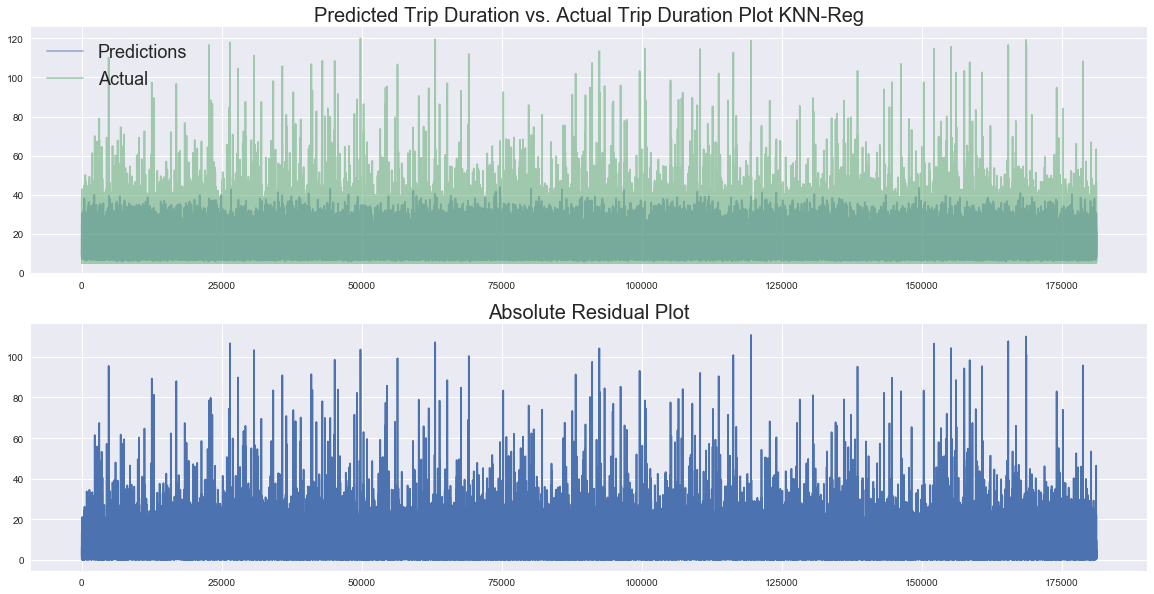

In [69]:
# KNN Regression Attempt
y_cls =  subset_trips_regression['Trip Duration Minutes']
XX_cls = subset_trips_regression.drop('Trip Duration Minutes',axis=1)
X_train, X_test, y_train, y_test = train_test_split(XX_cls, y_cls, test_size=0.33, random_state=42)

knn_reg=KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, y_train)

fig,ax=plt.subplots(2,1,figsize=(20,10))
preds=knn_reg.predict(X_test)
ax[0].plot(preds,alpha=0.5)
ax[0].plot(y_test.values,alpha=0.5)
ax[0].legend(['Predictions','Actual'],fontsize=18)
ax[0].set_title("Predicted Trip Duration vs. Actual Trip Duration Plot KNN-Reg",fontsize=20)
residuals=preds - y_test.values
mse=np.mean(np.square(residuals))
ax[1].set_title("Absolute Residual Plot",fontsize=20)
ax[1].plot(np.abs(residuals))  #Absolute Error Plot
print("Mean Squared Error",mse)
print("R2",knn_reg.score(X_test,y_test))

Sanity attempt using data-processing functions provided by the TAs.

In [74]:
def split_data(dt, train_percentage=0.5):
    X=dt.drop('Trip Duration Minutes', axis=1)
    y=dt[['Trip Duration Minutes']]
    total_trips=X.shape[0]
    train_end_idx=int(total_trips*train_percentage)
    total_trips=X.shape[0]
    X_train=X[:train_end_idx]
    X_test=X[train_end_idx:]
    y_train=y[:train_end_idx]
    y_test=y[train_end_idx:]
    return X_train,X_test,y_train,y_test

def evaluate_linreg(model,X_test,y_test):
    preds=model.predict(X_test)
    fig,ax=plt.subplots(2,1,figsize=(20,10))
    ax[0].plot(preds,alpha=0.5)
    ax[0].plot(y_test.values,alpha=0.5)
    ax[0].legend(['Predictions','Actual'],fontsize=18)
    ax[0].set_title("Predicted Trip Distance vs. Actual Trip Distance Plot",fontsize=20)
    residuals=preds - y_test.values
    mse=np.mean(np.square(residuals))
    ax[1].set_title("Absolute Residual Plot",fontsize=20)
    ax[1].plot(np.abs(residuals))  #Absolute Error Plot
    print("Mean Squared Error",mse)
    print("R2",model.score(X_test,y_test))
    
def evaluate_knnreg(model,X_test,y_test):
    preds=model.predict(X_test)
    fig,ax=plt.subplots(2,1,figsize=(20,10))
    ax[0].plot(preds,alpha=0.5)
    ax[0].plot(y_test.values,alpha=0.5)
    ax[0].legend(['Predictions','Actual'],fontsize=18)
    ax[0].set_title("Predicted Trip Duration vs. Actual Trip Duration Amount Plot KNN-Reg",fontsize=20)
    residuals=preds - y_test.values
    mse=np.mean(np.square(residuals))
    ax[1].set_title("Absolute Residual Plot",fontsize=20)
    ax[1].plot(np.abs(residuals))  #Absolute Error Plot
    print("Mean Squared Error",mse)
    print("R2",model.score(X_test,y_test))

Mean Squared Error 31.6972584737
R2 0.517401505704


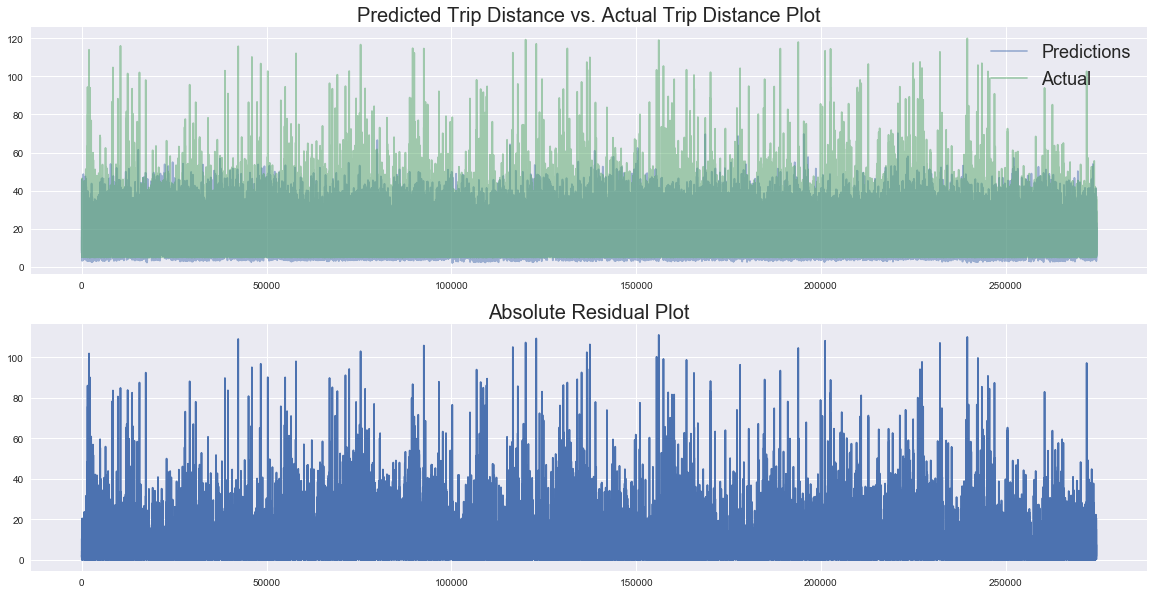

In [75]:
X_train,X_test,y_train,y_test =split_data(subset_trips_regression)
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
evaluate_linreg(lin_reg,X_test,y_test)

Mean Squared Error 39.6240022471
R2 0.396714897653


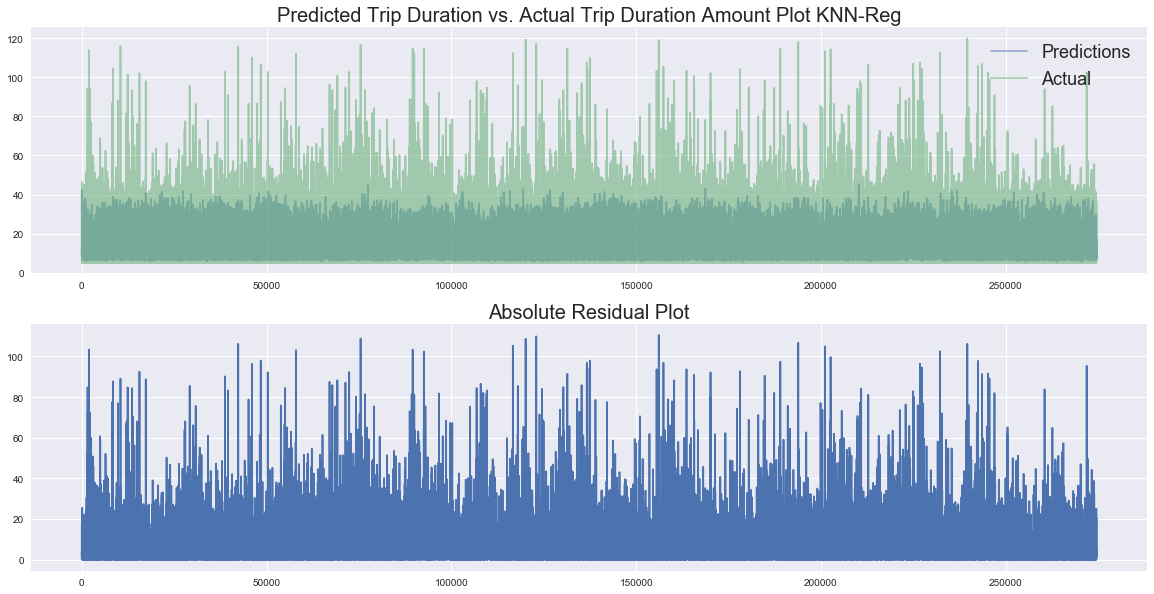

In [76]:
X_train,X_test,y_train,y_test =split_data(subset_trips_regression)
knn_reg=KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, y_train)
evaluate_knnreg(knn_reg,X_test,y_test)

While both Linear Regression and KNN-Regression plots seem to be awful by definition of the usage of the R2 value as a coefficient of determination with Linear Regression hovering at 0.5 and KNN hovering at 0.4, indicating that neither regression is a particularly effective predictor of the trip duration.

It should be noted that, in this scenario, the k has not necessarily been "tuned" to the data-set, as a tuned data-set will almost certainly perform better but obviously requires trade-offs in necessary compute-time.

At least in this un-tuned k scenario, and even with the bad R2 scores, it is interesting to note that Linear Regression performs better. This provides insight that the distribution is more linearly separated than it is parametrically.